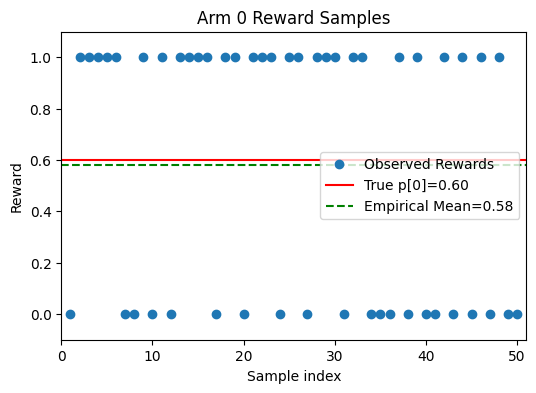

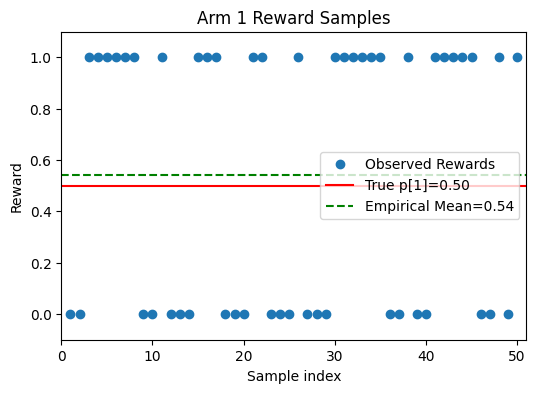

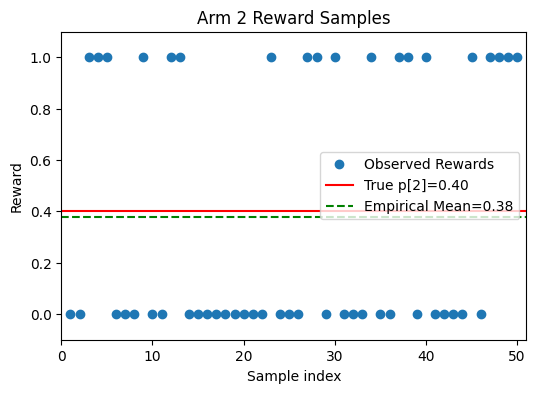

In [2]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy.random.mtrand import beta
import math


delta = 0.1

# p[i] = Bernoulli success probability for arm i
p: List[float] = [0.5 + delta, 0.5, 0.5 - delta]


class Bandit:
    def __init__(self, p: List[float]):
        self.p = p
        self.k = len(p)
        self.p_estimate = [0.0] * self.k
        self.n = [0] * self.k  # How many times each arm has been sampled

    def sample(self, action_index: int) -> int:
        rand_value: float = random.random()
        reward: int = 1 if rand_value < p[action_index] else 0
        return reward

    def updateAvg(self, action_index: int, reward: int) -> None:
        self.n[action_index] += 1
        self.p_estimate[action_index] += (
            reward - self.p_estimate[action_index]
        ) / self.n[action_index]

    def update(self, action_index, reward, learning_rate=0.1) -> None:
        self.p_estimate[action_index] += learning_rate * (
            reward - self.p_estimate[action_index]
        )


mybandit = Bandit(p)

# Q1
results_q1 = []
# Run 50 samples for each arm
for action_index in range(mybandit.k):
    arm_samples = []
    for _ in range(50):
        reward = mybandit.sample(action_index)
        arm_samples.append(reward)
    results_q1.append(arm_samples)

for action_index in range(mybandit.k):
    samples = results_q1[action_index]  # The 50 samples for this arm
    emp_mean = sum(samples) / len(samples)

    plt.figure(figsize=(6, 4))
    # Plot discrete rewards (0 or 1) at their sample index
    plt.plot(range(1, len(samples) + 1), samples, "o", label="Observed Rewards")

    # True parameter (drawn as a solid red line)
    plt.axhline(
        y=p[action_index],
        color="r",
        linestyle="-",
        label=f"True p[{action_index}]={p[action_index]:.2f}",
    )

    # Empirical mean (drawn as a dashed green line)
    plt.axhline(
        y=emp_mean, color="g", linestyle="--", label=f"Empirical Mean={emp_mean:.2f}"
    )

    plt.ylim([-0.1, 1.1])
    plt.xlim([0, 51])  # 1..50
    plt.xlabel("Sample index")
    plt.ylabel("Reward")
    plt.title(f"Arm {action_index} Reward Samples")
    plt.legend()
    plt.show()


# Q2
results_q2 = []
results_q2_estimates = []
# Run 50 samples for each arm
for action_index in range(mybandit.k):
    arm_samples = []
    estimate_samples = []
    for _ in range(50):
        reward = mybandit.sample(action_index)
        arm_samples.append(reward)
        estimate_samples.append(mybandit.p_estimate[action_index])
    results_q2.append(arm_samples)
    results_q2_estimates.append(estimate_samples)